### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-27/02/20
#### Clasificacion de imagenes motoras en EEG con CNN-1D
##### Caracteristicas = RWE-DWT
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 56.60%
##### Kappa = 0.4213

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 3))
x_test = x_test.reshape((n_samples_test, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3)
(288, 22, 3)


In [11]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


In [0]:
def CNN_1D():
  model = Sequential()
  model.add(Conv1D(32, 3, activation='relu', padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 - 0s - loss: 1.2311 - acc: 0.5660
kappa:  0.4212962962962963
f1: 0.5660614686218906
confusion matrix:
 [[48 12  5  7]
 [23 41  7  1]
 [13  1 32 26]
 [11  2 17 42]]


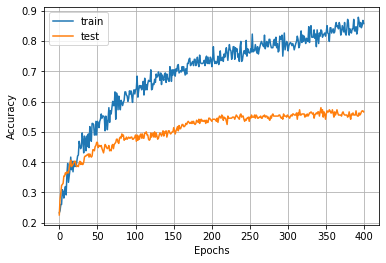

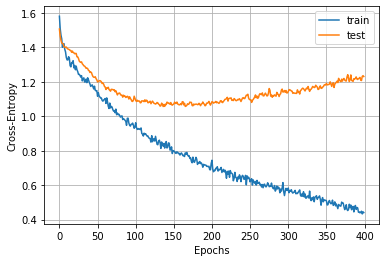

Iteration: 2
288/288 - 0s - loss: 1.2805 - acc: 0.5035
kappa:  0.3379629629629629
f1: 0.5022862270385661
confusion matrix:
 [[36 26  3  7]
 [19 47  5  1]
 [17  1 32 22]
 [14  2 26 30]]


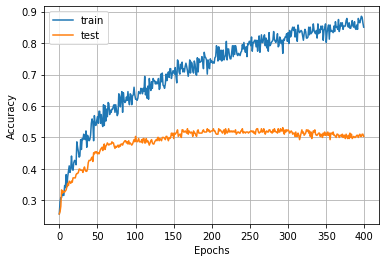

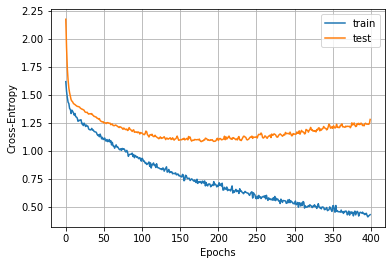

Iteration: 3
288/288 - 0s - loss: 1.4308 - acc: 0.4514
kappa:  0.2685185185185185
f1: 0.45286997305140964
confusion matrix:
 [[42 20  6  4]
 [33 31  7  1]
 [22  0 28 22]
 [20  2 21 29]]


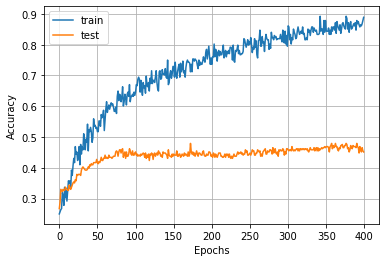

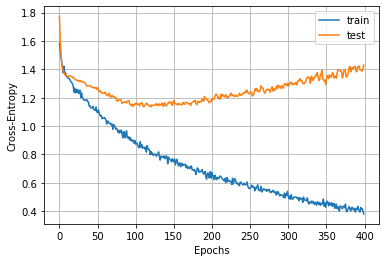

Iteration: 4
288/288 - 0s - loss: 1.2763 - acc: 0.5312
kappa:  0.375
f1: 0.5327429228816453
confusion matrix:
 [[40 19  5  8]
 [23 42  6  1]
 [12  2 38 20]
 [15  2 22 33]]


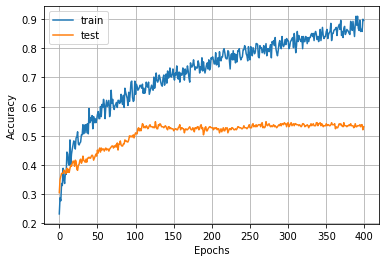

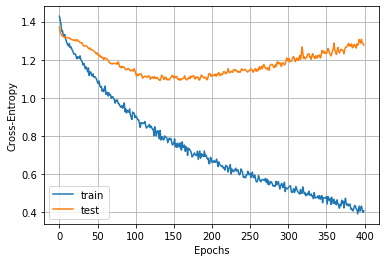

Iteration: 5
288/288 - 0s - loss: 1.3870 - acc: 0.4826
kappa:  0.31018518518518523
f1: 0.4834592156311372
confusion matrix:
 [[40 21  4  7]
 [25 39  6  2]
 [19  1 27 25]
 [15  1 23 33]]


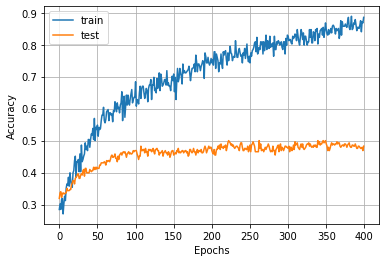

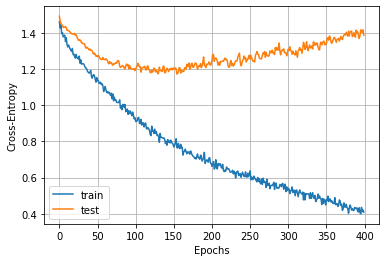


Resultados:
loss: [1.2310719225141737, 1.2804570926560297, 1.4307982391781278, 1.2762604686948988, 1.3869553605715434]
accuracy: [0.5659722, 0.5034722, 0.4513889, 0.53125, 0.4826389]
kappa: [0.4212962962962963, 0.3379629629629629, 0.2685185185185185, 0.375, 0.31018518518518523]
f1: [0.5660614686218906, 0.5022862270385661, 0.45286997305140964, 0.5327429228816453, 0.4834592156311372]


In [13]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = CNN_1D()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [14]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 3, 32)             2144      
_________________________________________________________________
flatten_4 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                6208      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 260       
Total params: 8,612
Trainable params: 8,612
Non-trainable params: 0
_________________________________________________________________


In [15]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.5069
Mean Kappa: 0.3426
Mean F1: 0.5075
Max Accuracy: 0.5660
Max Kappa: 0.4213
Max F1: 0.5661
